In [1]:
import pandas as pd
from skmultilearn.model_selection import iterative_train_test_split
import json
import numpy as np
import matplotlib.pyplot as plt

from modules import * 

from decouple import config

DATA_PATH = config("DATA_PATH")
SPEC_PATH = config('SPEC_PATH')
SPLIT_PATH = config('SPLIT_PATH')

In [2]:
metadata_path = f'{DATA_PATH}metadata.csv'
bird_path = f'{DATA_PATH}all_birds.json'

In [3]:
# Load data 
with open(bird_path) as f:
    birds = json.load(f)

num_classes = len(birds)

metadata = pd.read_csv(metadata_path)

# Loads data into Dataset and extracts indices and labels from that
data = SimpleDataset(metadata, 'birdclef-2022/', mode='train', labels=birds)
y = np.logical_or(data.primary_label, data.secondary_label)
X = data.df.index.to_numpy().reshape(-1,1)

In [4]:
test_split = 0.05
val_slit = 0.05

# Uses the scikit-multilearn library to do a multilabel stratified fold
X_train, y_train, X_test_val, y_test_val = iterative_train_test_split(X, y, test_size = test_split + val_slit)
X_val, y_val, X_test, y_test = iterative_train_test_split(X_test_val, y_test_val, test_size = test_split/(val_slit+test_split))

In [5]:
# plots the histogram of all splits to check if they are similar
def plot_hist(y):
    labels = np.argwhere(y==True)[:,1]
    plt.hist(labels, bins=142)

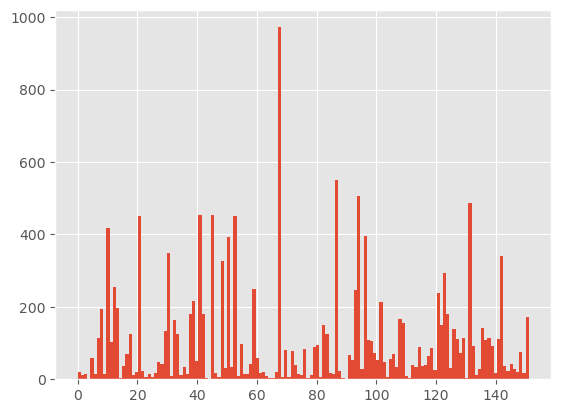

In [6]:
plot_hist(y_train)

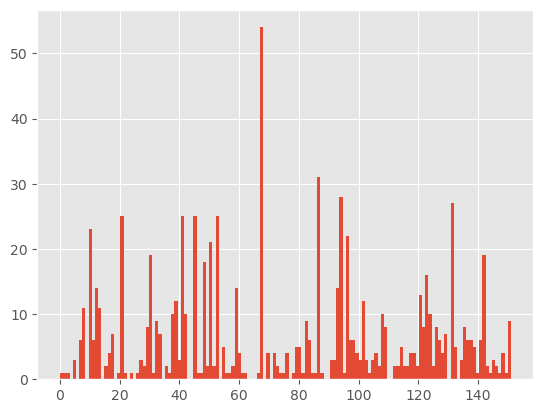

In [7]:
plot_hist(y_val)

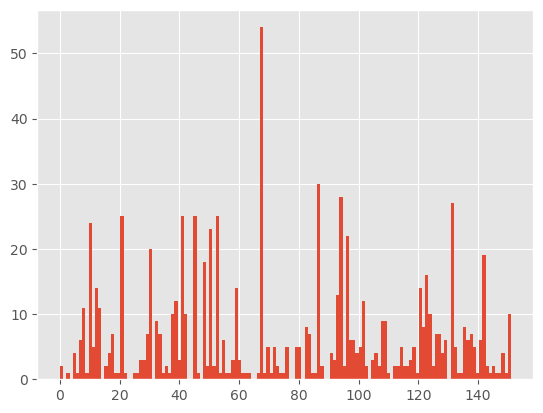

In [8]:
plot_hist(y_test)

In [9]:
# creates new metadata files and saves them
metadata_train = metadata.iloc[X_train.squeeze()]
metadata_val = metadata.iloc[X_val.squeeze()]
metadata_test = metadata.iloc[X_test.squeeze()]

metadata_train.to_csv(f'{SPLIT_PATH}train_metadata.csv')
metadata_val.to_csv(f'{SPLIT_PATH}val_metadata.csv')
metadata_test.to_csv(f'{SPLIT_PATH}test_metadata.csv')